In [1]:
import os, sys
sys.path.append(os.path.abspath("../src"))

import numpy as np
import scipy as sp
import qutip

import optimization, simulation, utils, visualization

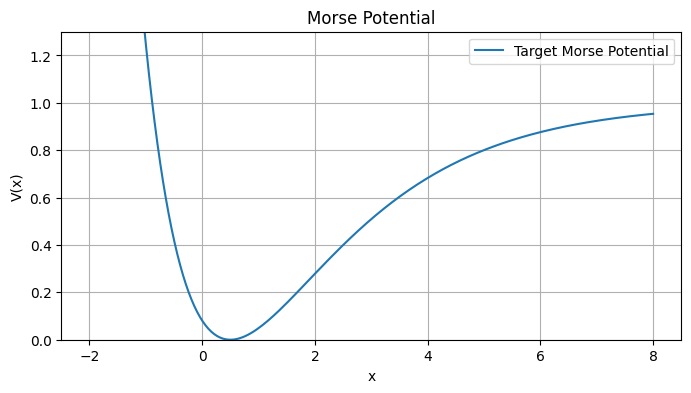

In [2]:
morse_potential = utils.MorsePotential(
    de = 1.0,
    b = 0.5,
    x0 = 0.5
)

morse_potential.plot_potential()

In [3]:
backend = utils.Gates(
    dim = 40,
    time = 1
)

depth = 6

sequence_template = [
    utils.ControlledDisplacement,
    utils.RotationGate,
    utils.ControlledCVRotation
]   

morse_evolution = backend.full_morse_time_evolution(morse_potential)
morse_hamiltonian = backend.full_morse_hamiltonian(morse_potential)

In [4]:
init_qubit_state = qutip.basis(2,0)
init_qumode_state = qutip.coherent(backend.dim, 1)
full_init_state = qutip.tensor(init_qubit_state, init_qumode_state)

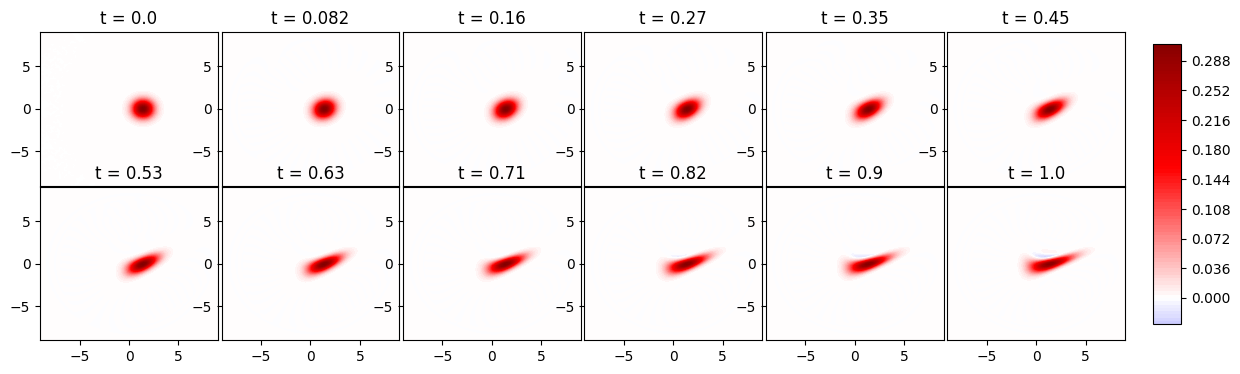

In [5]:
true_results = simulation.simulate(
    init_state = full_init_state,
    full_hamiltonian = morse_hamiltonian,
    end_time = 1.0,
    backend = backend
)

visualization.plot_wigner_fucntion(true_results, 1)

In [6]:
optimal_params = optimization.run_optimization(
    seq_template = sequence_template,
    backend = backend,
    d = depth,
    target_evolution = morse_evolution,
    init_state = full_init_state,
    trace_index = 1,
    loss_function = optimization.infidelity,
    mode = 'coordinate-descent',
    max_iterations = 5
)

Optimized Controlled Displacement, Iteration 1
Current Infidelity: 0.134381

Optimized Qubit XY Rotation, Iteration 1
Current Infidelity: 0.132217

Optimized Controlled CV Rotation, Iteration 1
Current Infidelity: 0.131941

Optimized Controlled Displacement, Iteration 2
Current Infidelity: 0.130882

Optimized Qubit XY Rotation, Iteration 2
Current Infidelity: 0.130882

Optimized Controlled CV Rotation, Iteration 2
Current Infidelity: 0.130882

Optimized Controlled Displacement, Iteration 3
Current Infidelity: 0.130714

Optimized Qubit XY Rotation, Iteration 3
Current Infidelity: 0.130714

Optimized Controlled CV Rotation, Iteration 3
Current Infidelity: 0.130714

Optimized Controlled Displacement, Iteration 4
Current Infidelity: 0.130714

Optimized Qubit XY Rotation, Iteration 4
Current Infidelity: 0.130714

Optimized Controlled CV Rotation, Iteration 4
Current Infidelity: 0.130714

Optimized Controlled Displacement, Iteration 5
Current Infidelity: 0.130714

Optimized Qubit XY Rotation

In [7]:
synthesized_evolution = optimization.build_sequence(
    params = optimal_params,
    seq_template = sequence_template,
    backend = backend,
    d = depth
)
synthesized_hamiltonian = (1j / backend.time) * sp.linalg.logm(synthesized_evolution)

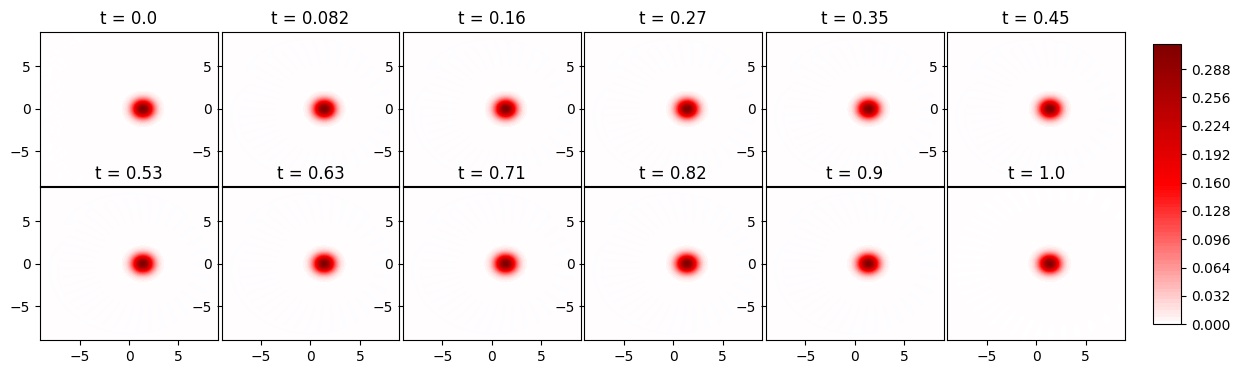

In [8]:
synthesized_reults = simulation.simulate(
    init_state = full_init_state,
    full_hamiltonian = synthesized_hamiltonian,
    end_time = 1.0,
    backend = backend
)
visualization.plot_wigner_fucntion(synthesized_reults, 1)